In [19]:
import pandas
import matplotlib.pyplot as plt
import seaborn
import numpy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
path_csv = "C:/Users/belkacem/Documents/Linear_regression/number of travelers.csv"
df = pandas.read_csv(path_csv, sep=",")

In [21]:
df.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [22]:
df['date'] = pandas.to_datetime(df['month'])

In [23]:
df.head()

,month,passengers,date
0,2000-01-01,46492,2000-01-01
1,2000-02-01,48526,2000-02-01
2,2000-03-01,58764,2000-03-01
3,2000-04-01,56033,2000-04-01
4,2000-05-01,58201,2000-05-01


In [24]:
print(df.dtypes)

month                 object
passengers             int64
date          datetime64[ns]
dtype: object


In [25]:
df['month_name'] = df['date'].dt.month_name()
df.head()

,month,passengers,date,month_name
0,2000-01-01,46492,2000-01-01,January
1,2000-02-01,48526,2000-02-01,February
2,2000-03-01,58764,2000-03-01,March
3,2000-04-01,56033,2000-04-01,April
4,2000-05-01,58201,2000-05-01,May


In [26]:
one_hot_encoded = pandas.get_dummies(df['month_name'], dtype=int)

In [27]:
df= pandas.concat([df, one_hot_encoded], axis=1)
df

,month,passengers,date,month_name,April,August,December,February,January,July,June,March,May,November,October,September
0,2000-01-01,46492,2000-01-01,January,0,0,0,0,1,0,0,0,0,0,0,0
1,2000-02-01,48526,2000-02-01,February,0,0,0,1,0,0,0,0,0,0,0,0
2,2000-03-01,58764,2000-03-01,March,0,0,0,0,0,0,0,1,0,0,0,0
3,2000-04-01,56033,2000-04-01,April,1,0,0,0,0,0,0,0,0,0,0,0
4,2000-05-01,58201,2000-05-01,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2019-08-01,83784,2019-08-01,August,0,1,0,0,0,0,0,0,0,0,0,0
236,2019-09-01,72590,2019-09-01,September,0,0,0,0,0,0,0,0,0,0,0,1
237,2019-10-01,78617,2019-10-01,October,0,0,0,0,0,0,0,0,0,0,1,0
238,2019-11-01,73074,2019-11-01,November,0,0,0,0,0,0,0,0,0,1,0,0


# Regression lineaire

In [28]:
df_mean, df_std = df['passengers'].mean(), df['passengers'].std()
df['passengers'] = (df['passengers'] - df_mean)/df_std

In [30]:
df_length = len(df)
index_split = int(df_length * 0.75)
train_df = df[:index_split]
test_df = df[index_split:]

In [31]:
x_train = train_df[['January','February','March','April','May','June','July','August','September','October','November','December']].values
y_train = train_df["passengers"].values

In [32]:
x_test = test_df[['January','February','March','April','May','June','July','August','September','October','November','December']]
y_test = test_df["passengers"]

In [33]:
mod = LinearRegression()
mod.fit(x_train, y_train)

LinearRegression()

In [34]:
y_train_predict =  mod.predict(x_train)
y_test_predict = mod.predict(x_test)
y_train = y_train * df_std + df_mean
y_test = y_test * df_std + df_mean


C:\Users\belkacem\Documents\Linear_regression\data_env\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [35]:
y_train_predict = y_train_predict* df_std + df_mean
y_test_predict = y_test_predict* df_std + df_mean

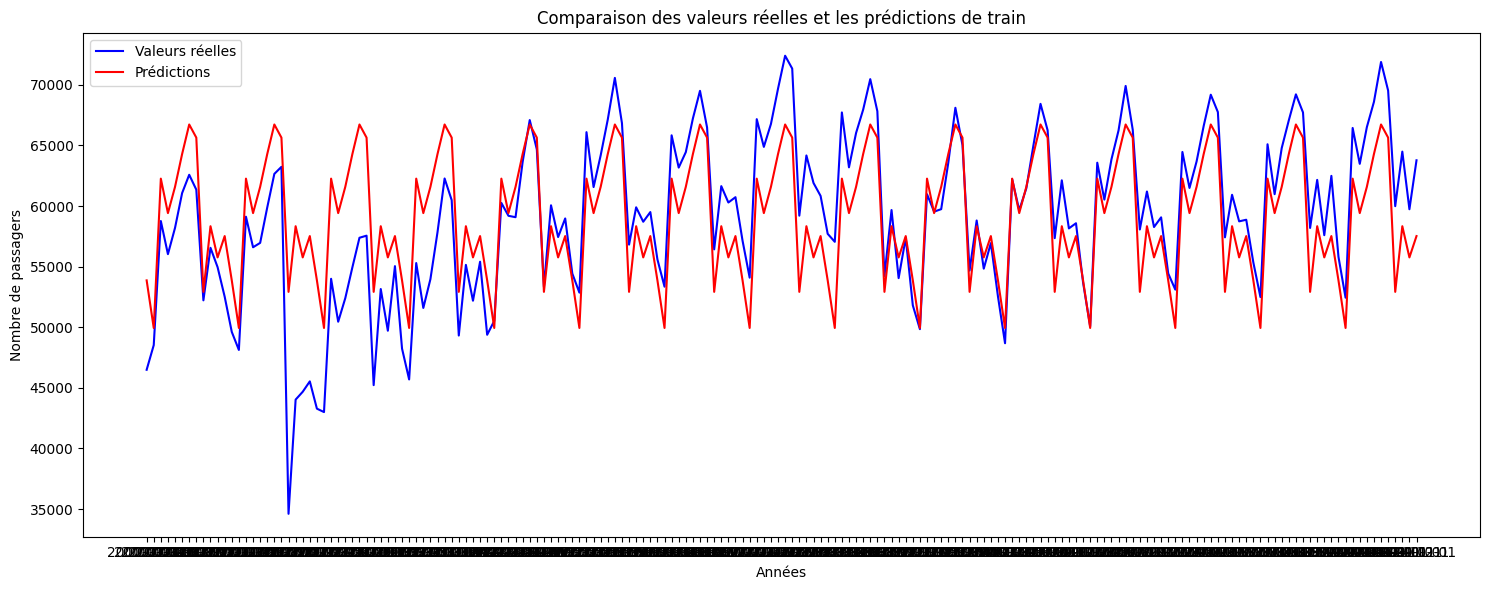

In [36]:
fig, ax = plt.subplots(figsize=(15, 6))

plt.plot(train_df["month"], y_train, color='b', label='Valeurs réelles')
plt.plot(train_df["month"], y_train_predict, color='r', label='Prédictions')

plt.xlabel('Années')
plt.ylabel('Nombre de passagers')
plt.title('Comparaison des valeurs réelles et les prédictions de train')

plt.legend()

plt.tight_layout()
plt.show()

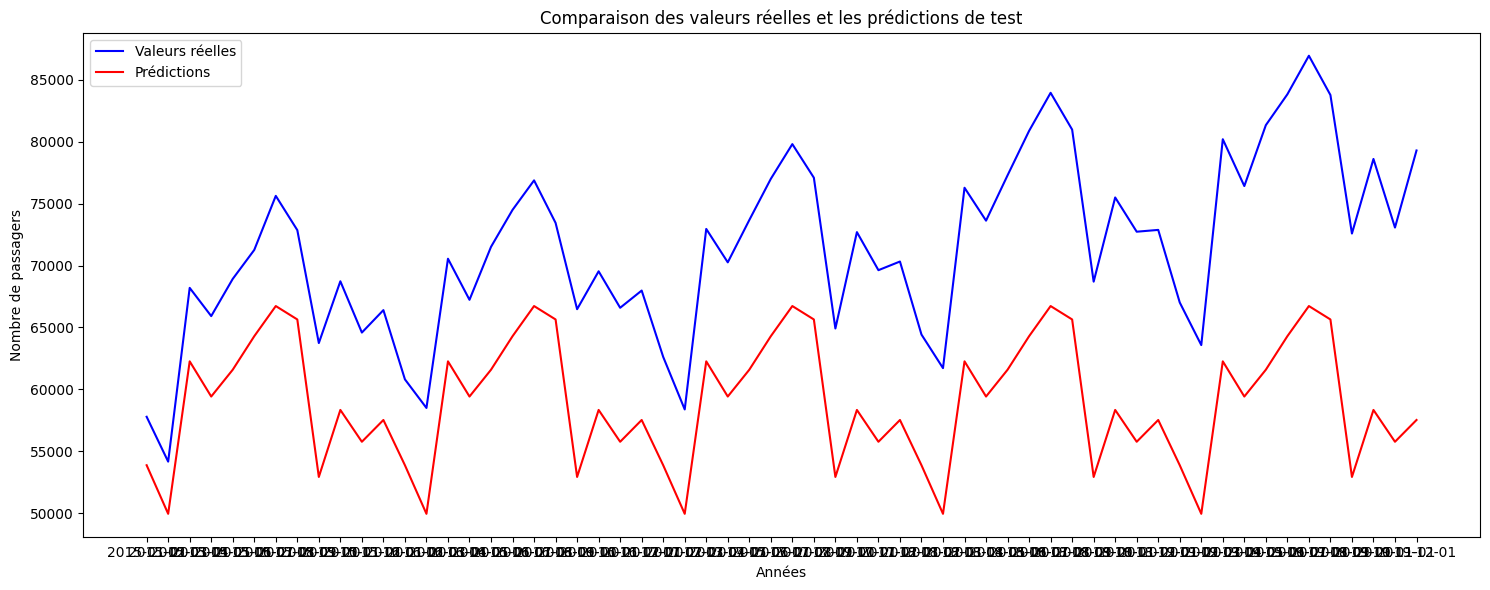

In [37]:
fig, ax = plt.subplots(figsize=(15, 6))

plt.plot(test_df["month"], y_test, color='b', label='Valeurs réelles')
plt.plot(test_df["month"], y_test_predict, color='r', label='Prédictions')

plt.xlabel('Années')
plt.ylabel('Nombre de passagers')
plt.title('Comparaison des valeurs réelles et les prédictions de test')

plt.legend()

plt.tight_layout()
plt.show()